In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


df_mat = pd.read_csv("data/student/student-mat.csv", sep=";", quotechar='"')
df_por = pd.read_csv("data/student/student-por.csv", sep=";", quotechar='"')

df_mat["subject"] = "math"
df_por["subject"] = "portuguese"

df = pd.concat([df_mat, df_por], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Dataset shape:", df.shape)
df.head()



Dataset shape: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,MS,M,18,R,GT3,T,3,2,other,other,...,5,5,5,5,5,8,9,10,11,portuguese
1,GP,M,17,U,LE3,A,4,1,services,other,...,5,4,2,4,5,30,8,8,8,math
2,GP,F,16,R,GT3,T,1,1,at_home,other,...,1,3,1,1,3,0,14,13,13,portuguese
3,MS,M,16,R,LE3,A,4,4,at_home,other,...,3,2,1,3,2,5,10,11,11,portuguese
4,GP,M,16,U,GT3,T,3,2,at_home,other,...,3,3,1,3,2,0,12,12,12,portuguese


In [5]:
print(df.isnull().sum())

target = "G3"
X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64
Numeric columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']


In [6]:
# Preprocessing Pipeline

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),       # scale numeric columns
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  # encode categorical
])

# Fit-transform preprocessing
X_processed = preprocessor.fit_transform(X)

print("Processed X shape:", X_processed.shape)


Processed X shape: (1044, 60)


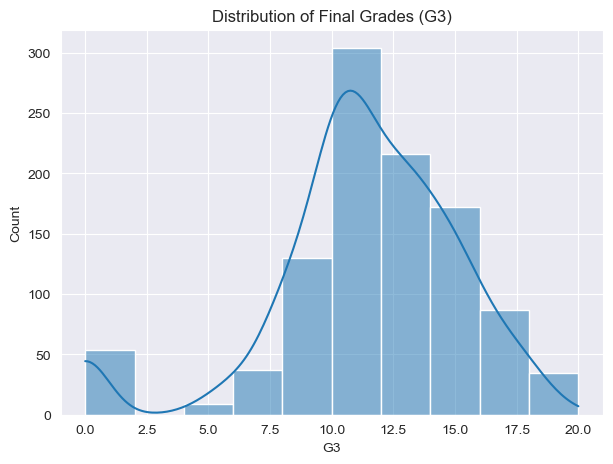

In [7]:
# EDA - Distribution of Target

plt.figure(figsize=(7,5))
sns.histplot(df[target], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.show()


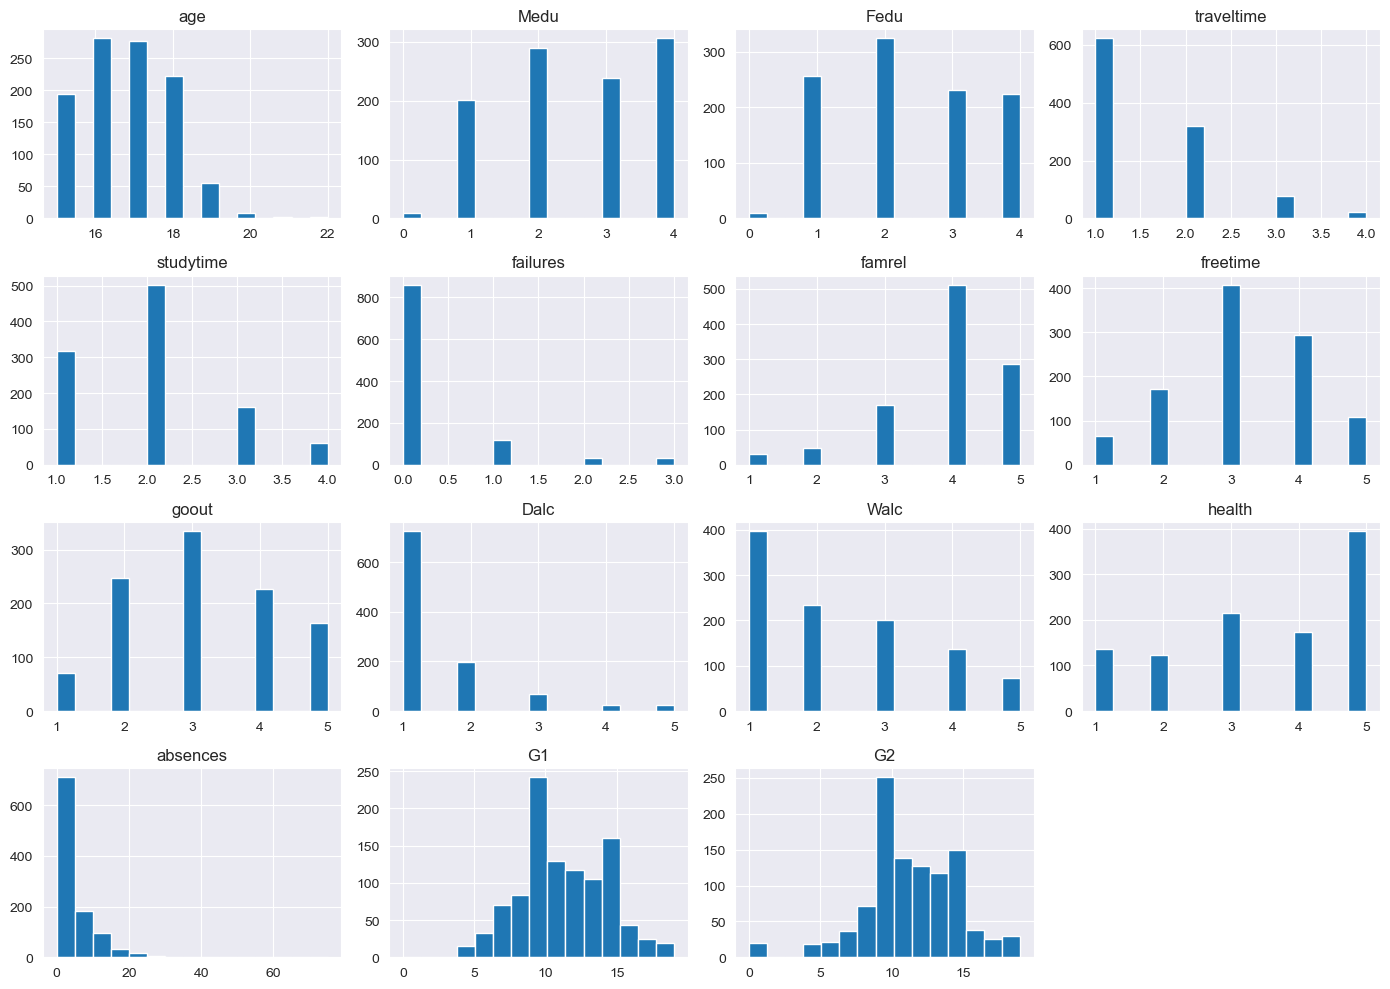

In [8]:
# Distribution of Numeric Features

df[num_cols].hist(figsize=(14,10), bins=15)
plt.tight_layout()
plt.show()


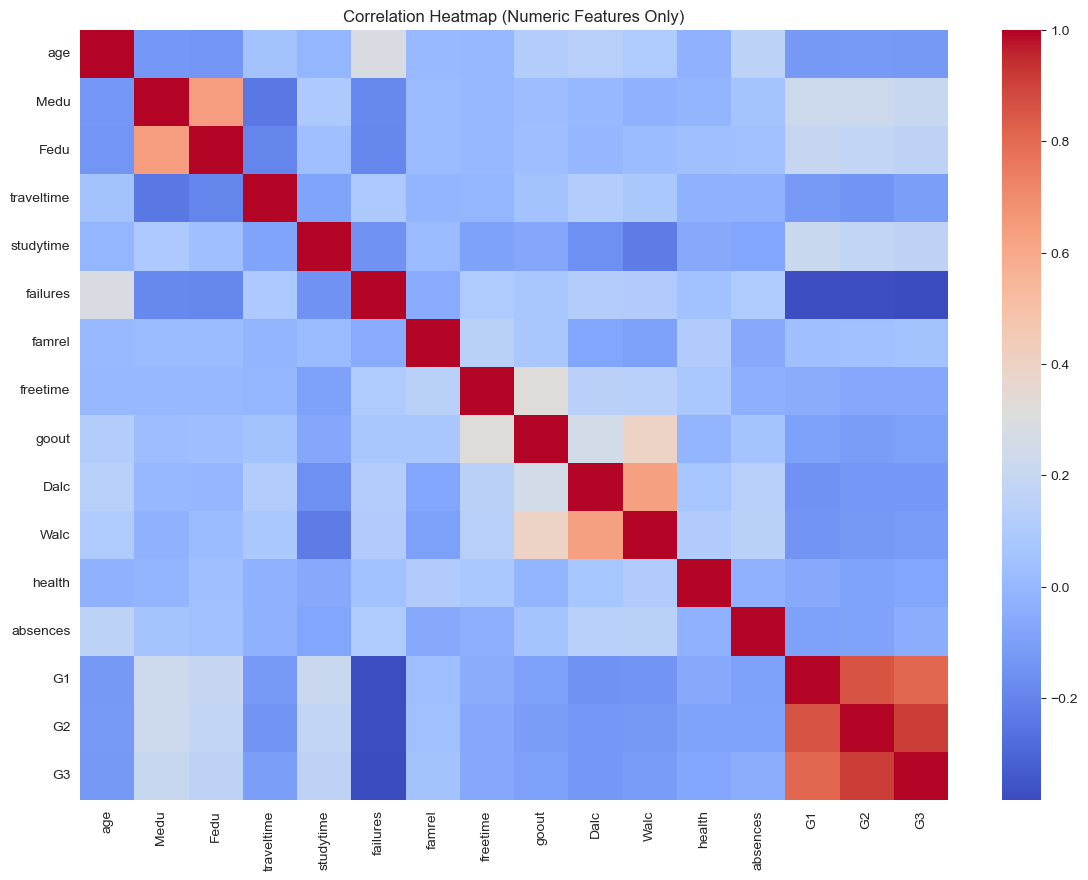

In [10]:
# Correlation Heatmap

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



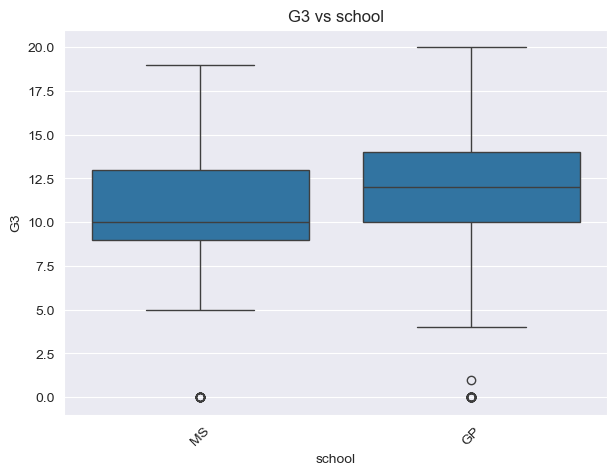

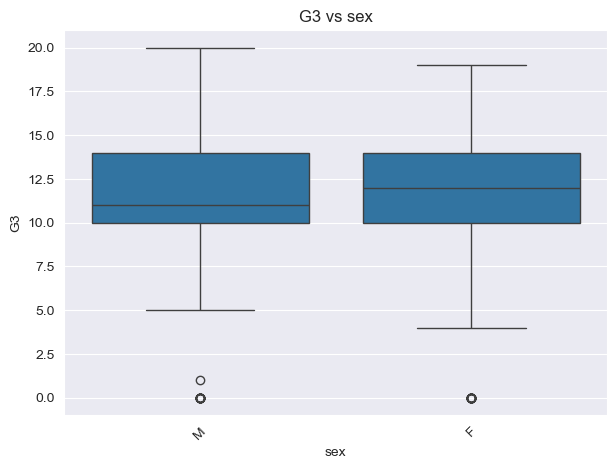

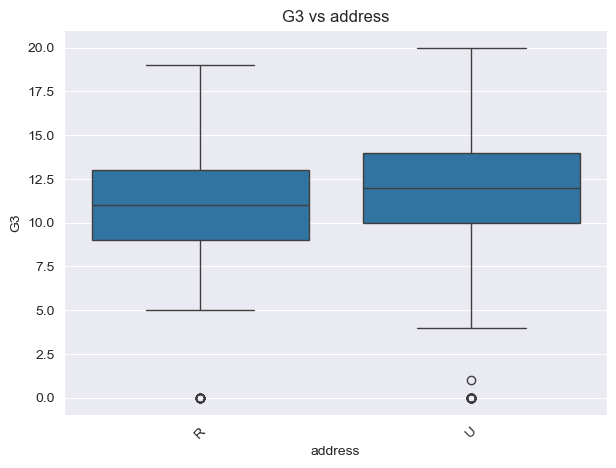

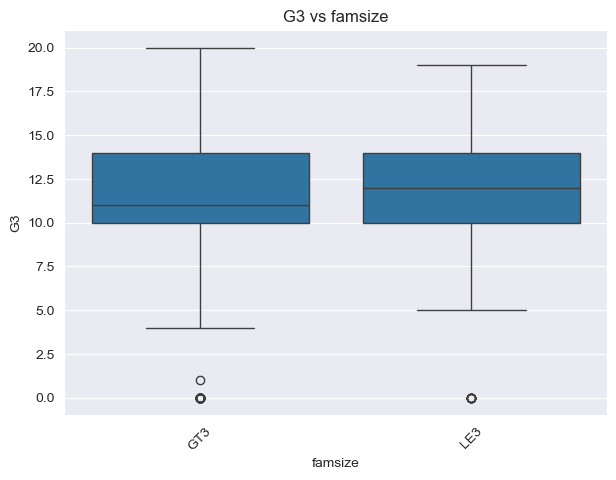

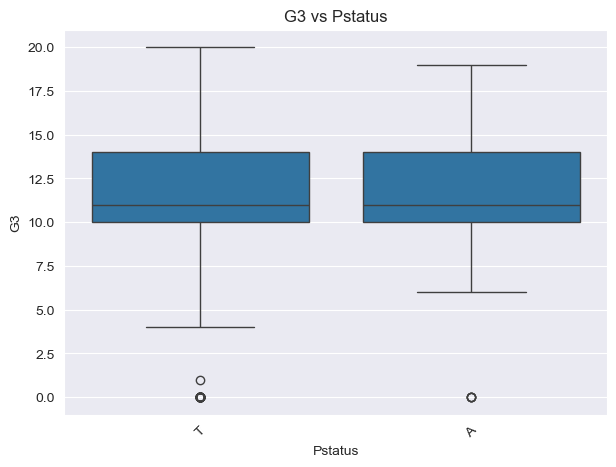

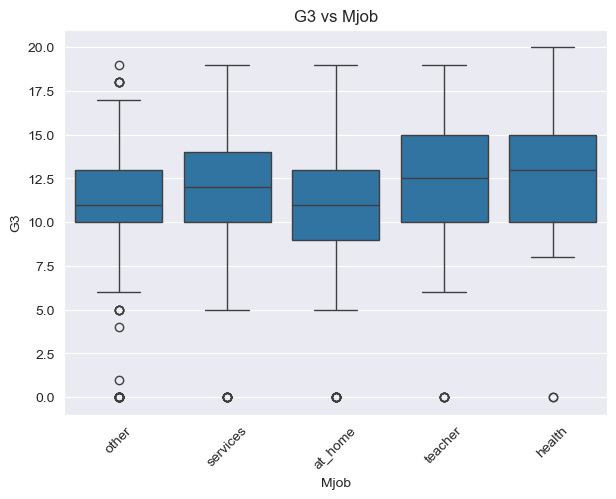

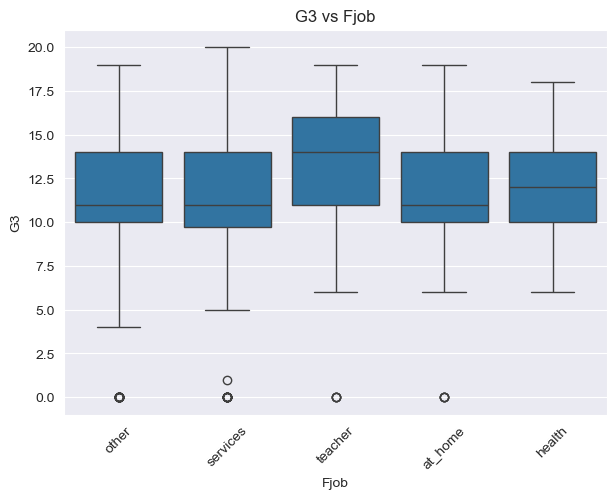

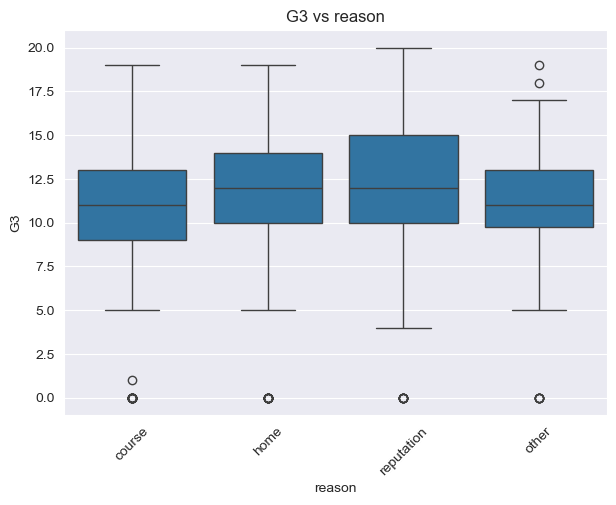

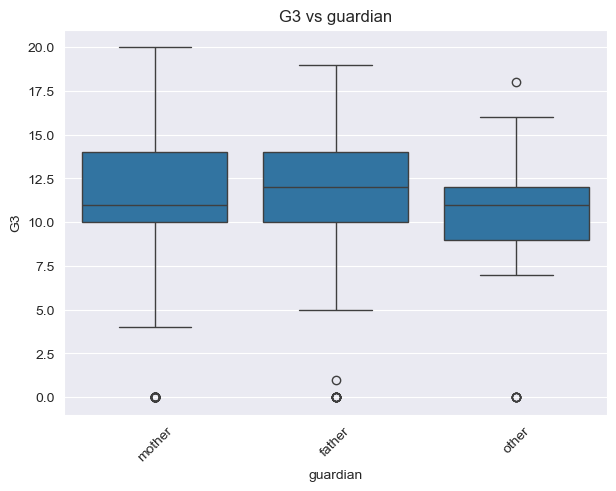

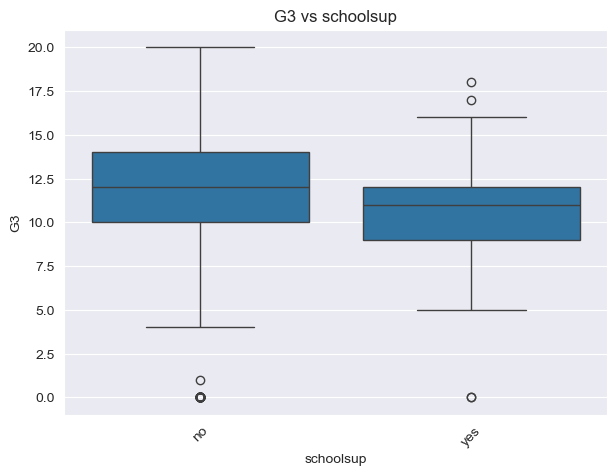

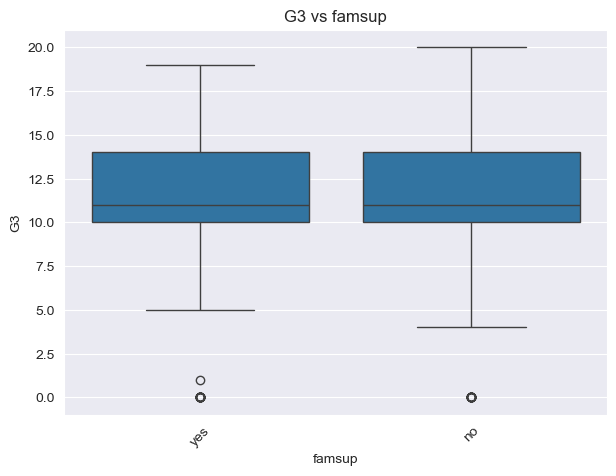

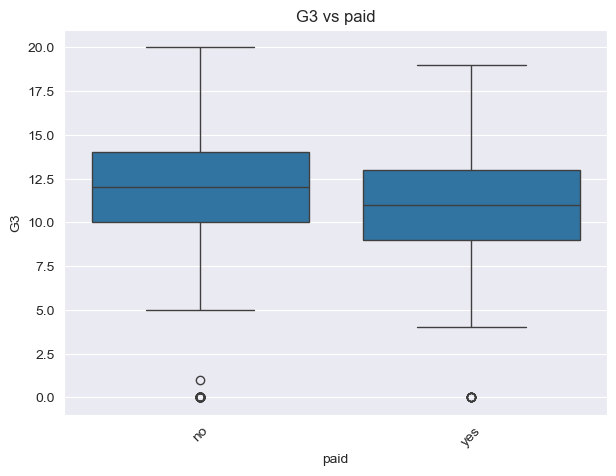

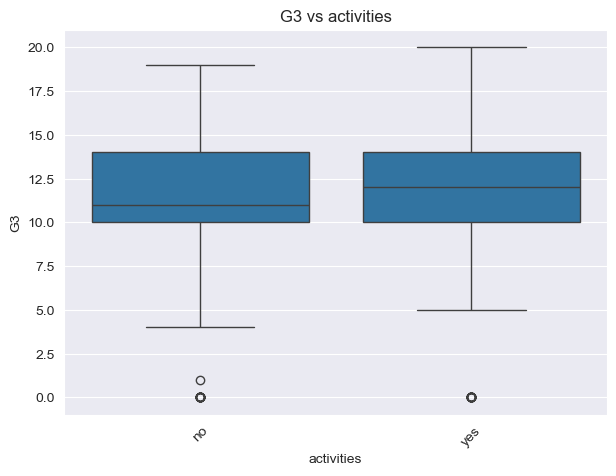

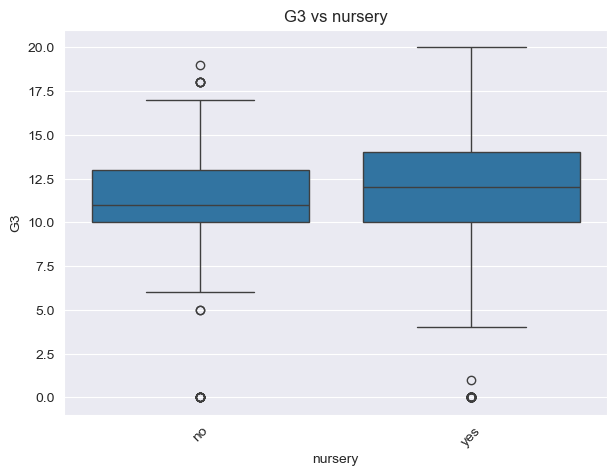

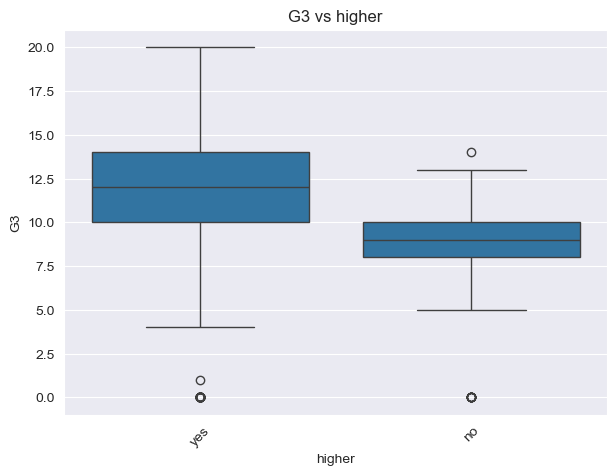

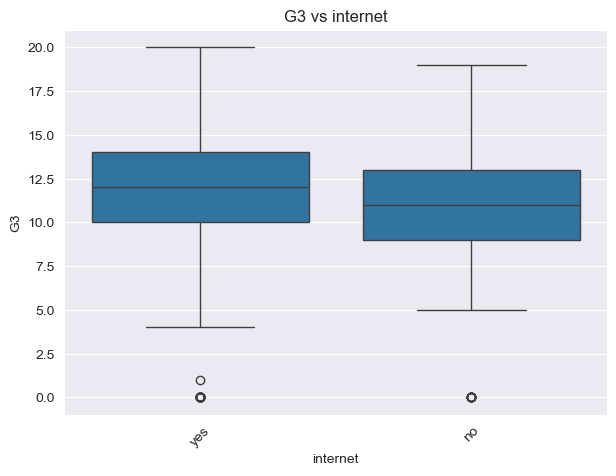

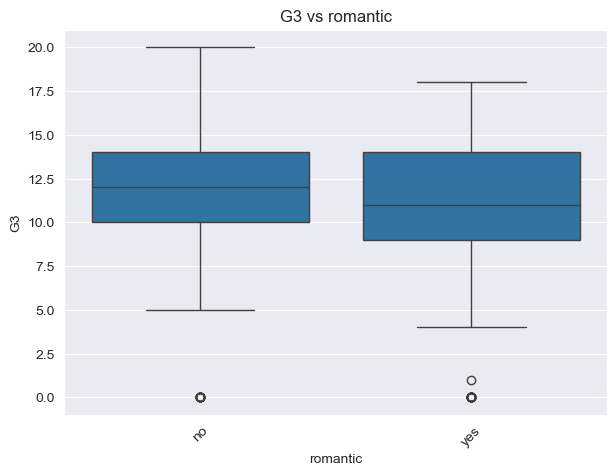

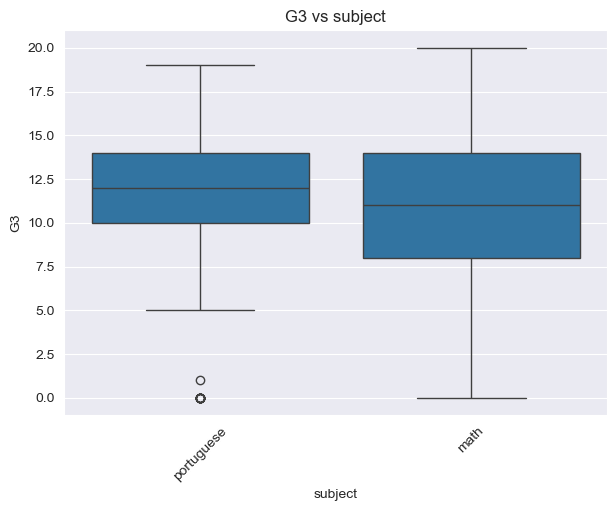

In [11]:
# Boxplots for Categorical Features vs Target

for col in cat_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=col, y="G3", data=df)
    plt.title(f"G3 vs {col}")
    plt.xticks(rotation=45)
    plt.show()


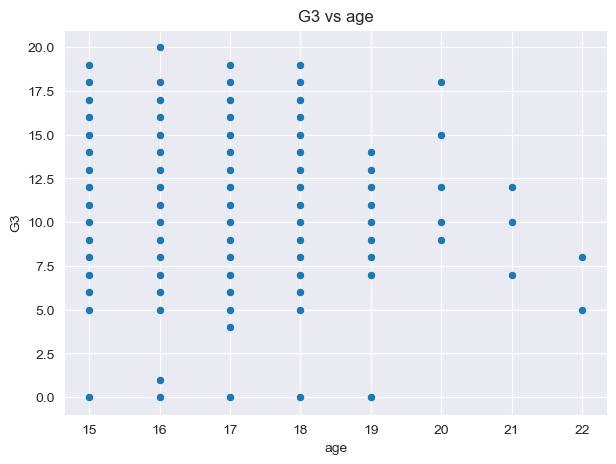

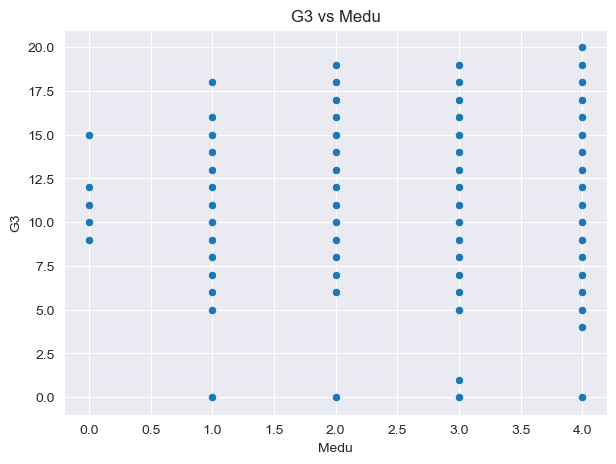

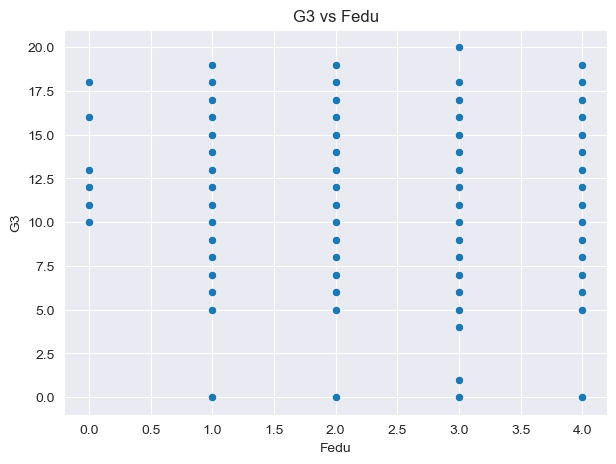

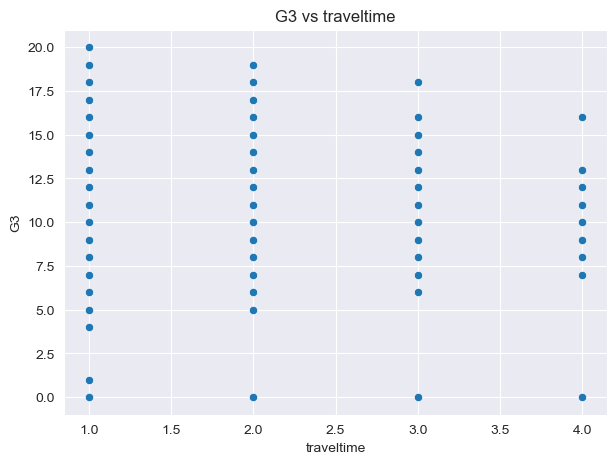

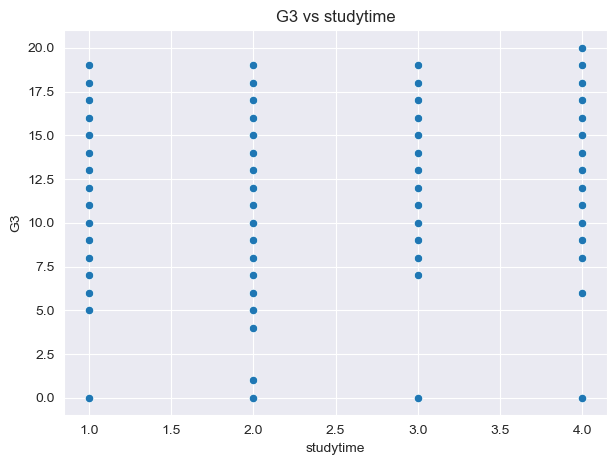

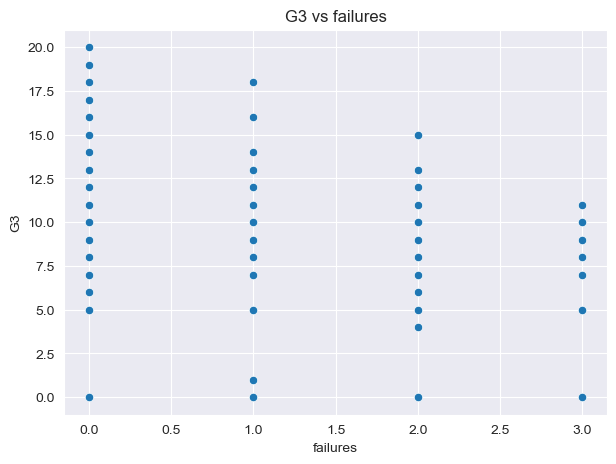

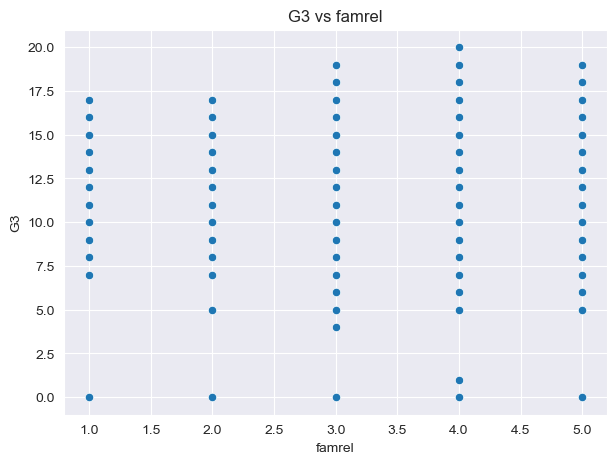

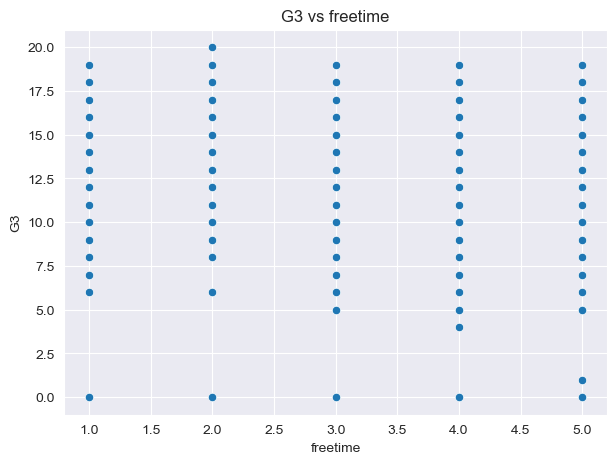

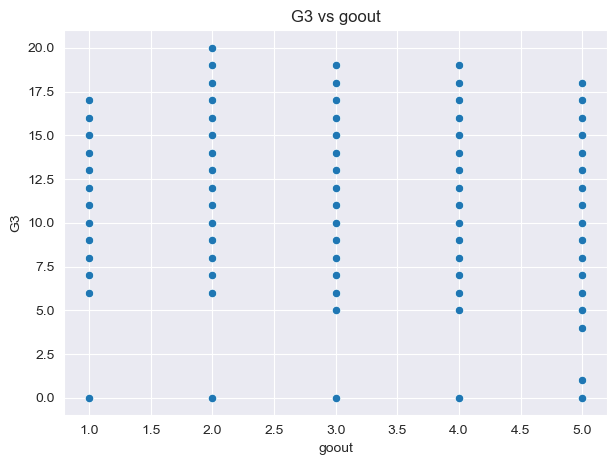

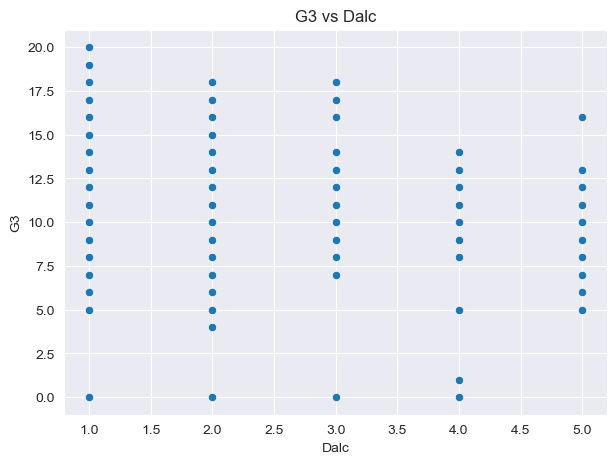

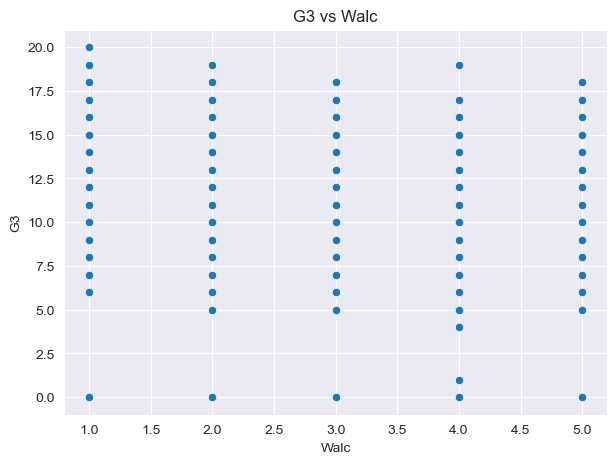

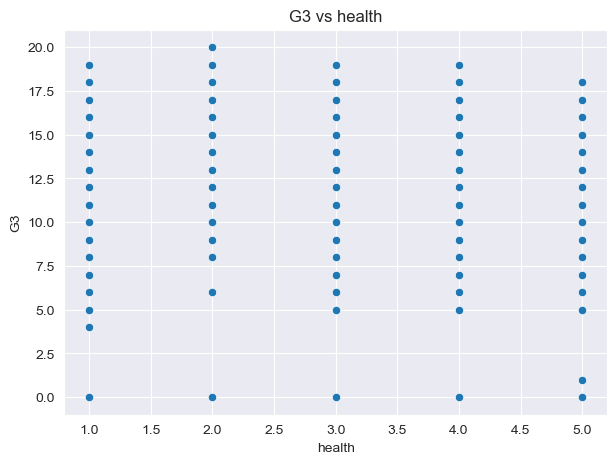

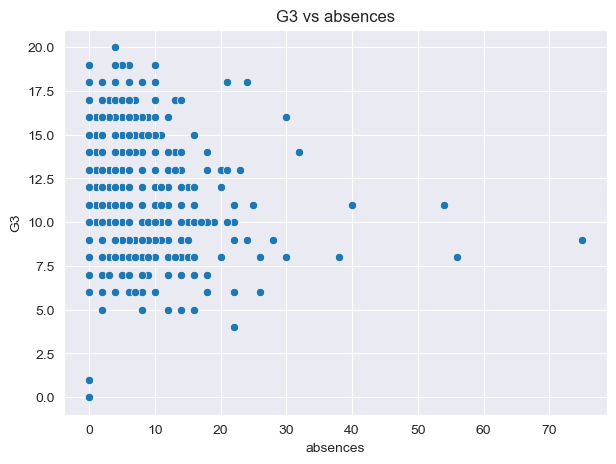

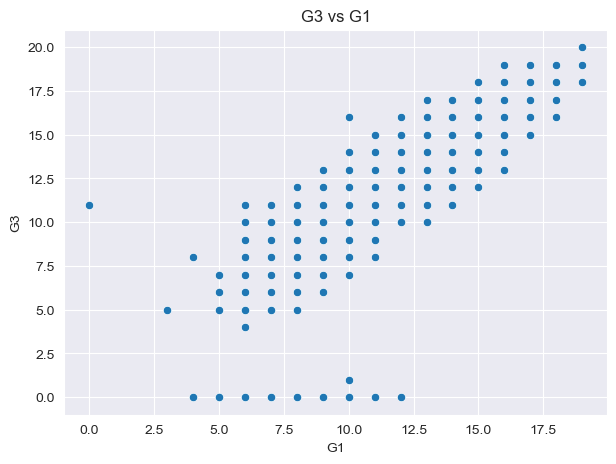

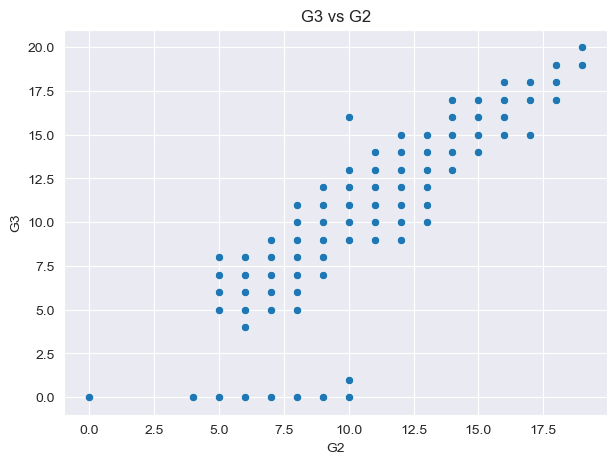

In [12]:
# Scatter plots for numeric features vs target

for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=col, y="G3", data=df)
    plt.title(f"G3 vs {col}")
    plt.show()
